### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [4]:
df_movies = pd.read_csv('../data/processed/movies_merge.csv')

### 1. Distribution of movie title length (characters)

This plot shows how many characters each movie title has. It helps us see whether titles tend to be short or long, how descriptive they are, and whether there are unusual (very short or very long) titles that might be outliers.

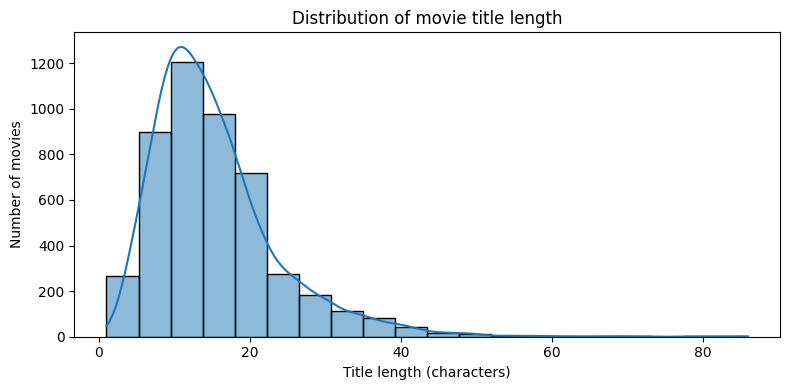

In [7]:
# 1. Title length (characters)
df_movies['title_length'] = df_movies['title'].str.len()

plt.figure(figsize=(8, 4))
sns.histplot(df_movies['title_length'], bins=20, kde=True)
plt.xlabel('Title length (characters)')
plt.ylabel('Number of movies')
plt.title('Distribution of movie title length')
plt.tight_layout()
plt.show()

### 2. Distribution of tag word count per movie

This chart shows how many words each movie has in its `tags` field. Higher values mean more textual metadata (genres, cast, keywords, etc.). The distribution tells us what share of movies have short vs long tag descriptions and helps spot sparse or very dense entries.

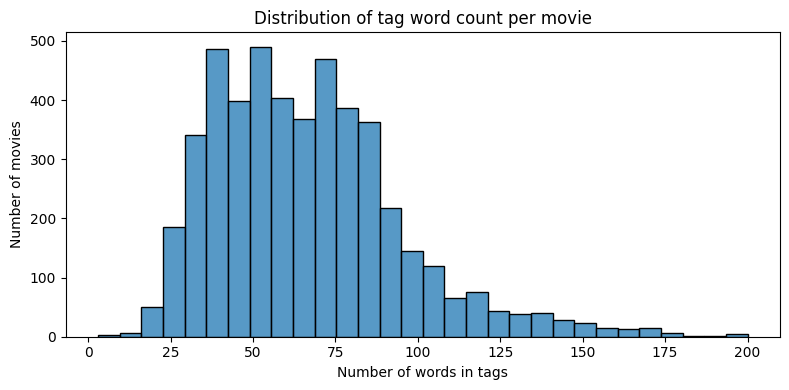

In [8]:
# 2. Distribution of tag word count per movie
df_movies['tags_word_count'] = df_movies['tags'].str.split().apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(df_movies['tags_word_count'], bins=30, kde=False)
plt.xlabel('Number of words in tags')
plt.ylabel('Number of movies')
plt.title('Distribution of tag word count per movie')
plt.tight_layout()
plt.show()

### 3. Top 20 most frequent tag words

This plot lists the 20 most common words in the `tags` column across all movies. These words reflect the dominant themes and genres in the dataset (e.g. action, adventure, comedy) and give a quick overview of what the catalog is about.

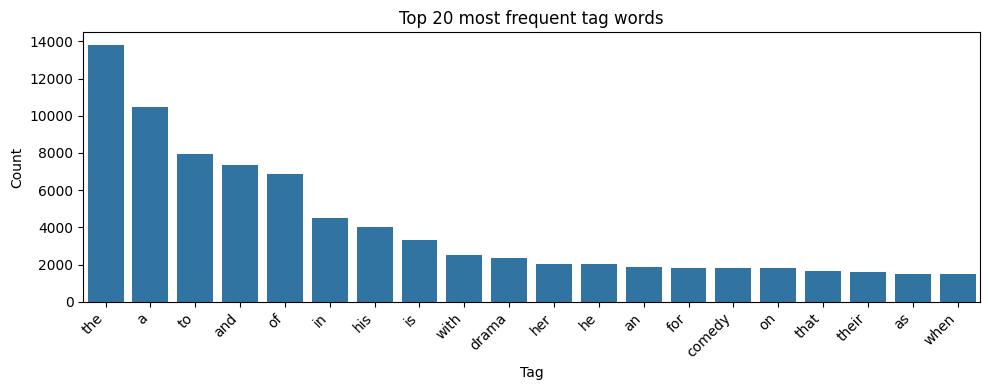

In [9]:
# 3. Top 20 most frequent tag words
from collections import Counter

all_tokens = df_movies['tags'].str.split()
flat_tokens = [token for tokens in all_tokens for token in tokens]

token_counts = Counter(flat_tokens)
top_tags = pd.DataFrame(token_counts.most_common(20), columns=['tag', 'count'])

plt.figure(figsize=(10, 4))
sns.barplot(data=top_tags, x='tag', y='count')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.title('Top 20 most frequent tag words')
plt.tight_layout()
plt.show()

### 4. Relationship between title length and tag word count

This scatter plot compares movie title length (in characters) with the number of words in `tags`. It shows whether longer titles tend to have more tag text (i.e. more metadata). A random sample of movies is used so the plot stays readable.

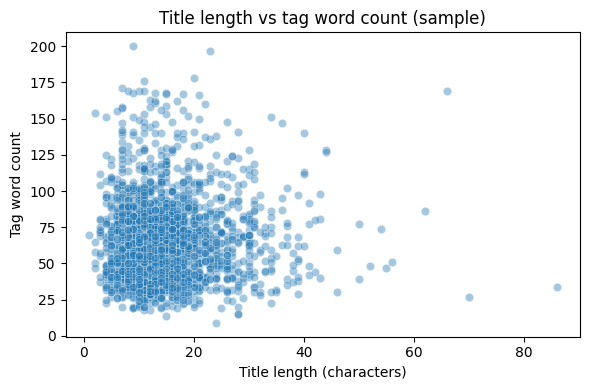

In [10]:
# 4. Relationship between title length and tag word count
# uses columns computed in previous cells
if 'title_length' not in df_movies.columns:
    df_movies['title_length'] = df_movies['title'].str.len()
if 'tags_word_count' not in df_movies.columns:
    df_movies['tags_word_count'] = df_movies['tags'].str.split().apply(len)

sample = df_movies.sample(n=min(2000, len(df_movies)), random_state=42)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=sample, x='title_length', y='tags_word_count', alpha=0.4)
plt.xlabel('Title length (characters)')
plt.ylabel('Tag word count')
plt.title('Title length vs tag word count (sample)')
plt.tight_layout()
plt.show()

### 5. Relationship between total and unique tag words per movie

This plot compares total tag word count with the number of unique words per movie. Points near the diagonal (x ≈ y) mean little repetition; points far below it mean many repeated words. That repetition can affect how we weight terms in the recommendation model.

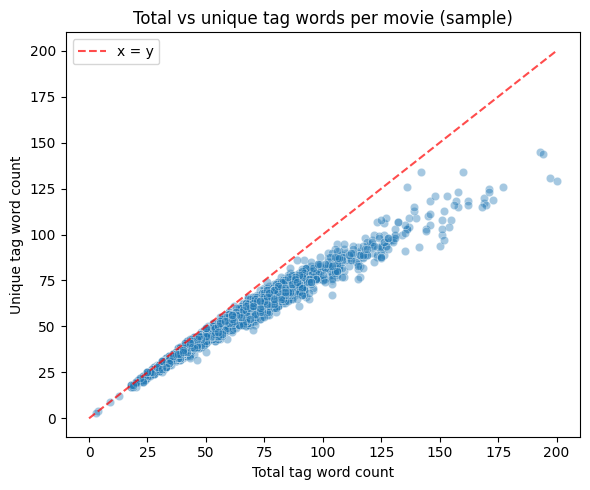

In [11]:
# 5. Total vs unique tag words per movie
if 'tags_word_count' not in df_movies.columns:
    df_movies['tags_word_count'] = df_movies['tags'].str.split().apply(len)
df_movies['tags_unique_count'] = df_movies['tags'].str.split().apply(lambda x: len(set(x)))

sample_5 = df_movies.sample(n=min(2000, len(df_movies)), random_state=43)
plt.figure(figsize=(6, 5))
sns.scatterplot(data=sample_5, x='tags_word_count', y='tags_unique_count', alpha=0.4)
plt.plot([0, sample_5['tags_word_count'].max()], [0, sample_5['tags_word_count'].max()], 'r--', alpha=0.7, label='x = y')
plt.xlabel('Total tag word count')
plt.ylabel('Unique tag word count')
plt.title('Total vs unique tag words per movie (sample)')
plt.legend()
plt.tight_layout()
plt.show()